In [109]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import re
import string
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
df = pd.read_csv('C:\\Users\\sarth\\Downloads\\archive\\twitter_training.csv')

df.head()



,ID,Label,Tweet
0,2401,Positive,im getting on borderlands and i will murder yo...
1,2401,Positive,I am coming to the borders and I will kill you...
2,2401,Positive,im getting on borderlands and i will kill you ...
3,2401,Positive,im coming on borderlands and i will murder you...
4,2401,Positive,im getting on borderlands 2 and i will murder ...


In [110]:
#Preprocessing the data

In [111]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for word in r:
        input_txt = re.sub(word, "", input_txt)
    return input_txt

df['Tweet'] = df['Tweet'].astype(str)

df['clean_tweet']=np.vectorize(remove_pattern)(df['Tweet'],"@[\w]*")

# Remove special chars,punctuations

df['clean_tweet']=df['clean_tweet'].str.replace("^a-zA-Z#"," ")

#Remove short words

df['clean_tweet']=df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split() if len(w)>3]))

#Split the sentence into individual words that will be considered as tokens

tokenized_tweet=df['clean_tweet'].apply(lambda x: x.split())


#Stem the words
import nltk
from nltk.stem.porter import PorterStemmer

stemmer=PorterStemmer()

tokenized_tweet=tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])


#Combine words into a single sentence

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet


(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

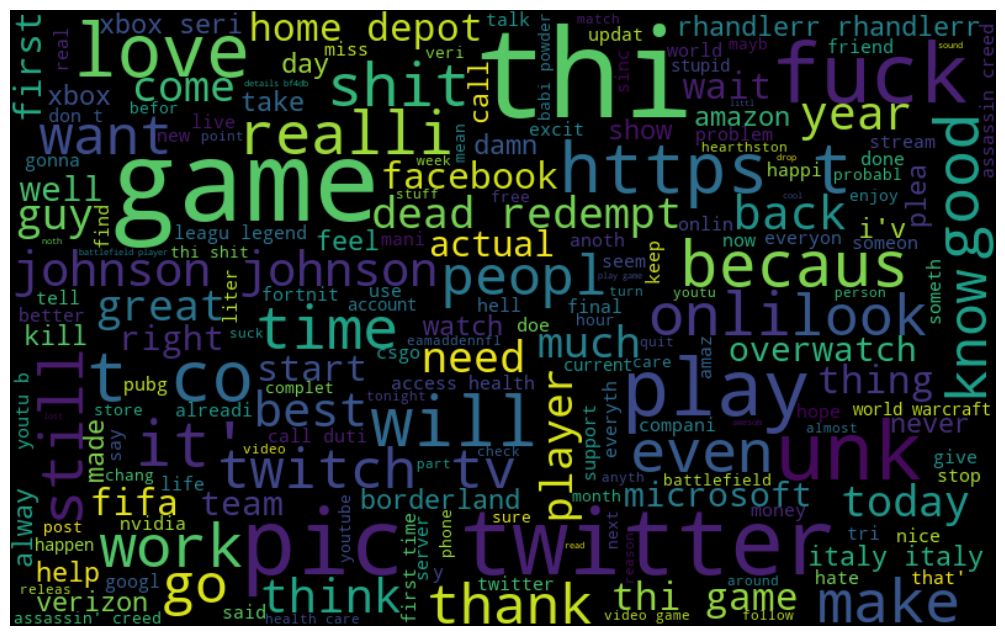

In [112]:
#Exploratory Data Analysis

#Visualize frequent words by adding the sentences into a single variable string
all_words=" ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')


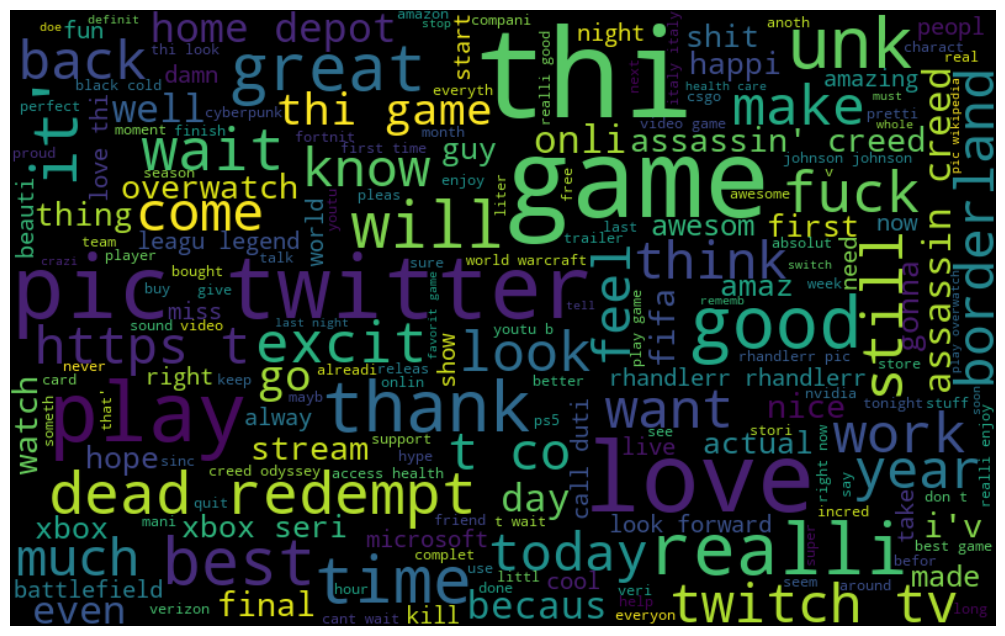

In [113]:
#Frequent words visualization for positive words
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['Label']=='Positive']])


wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

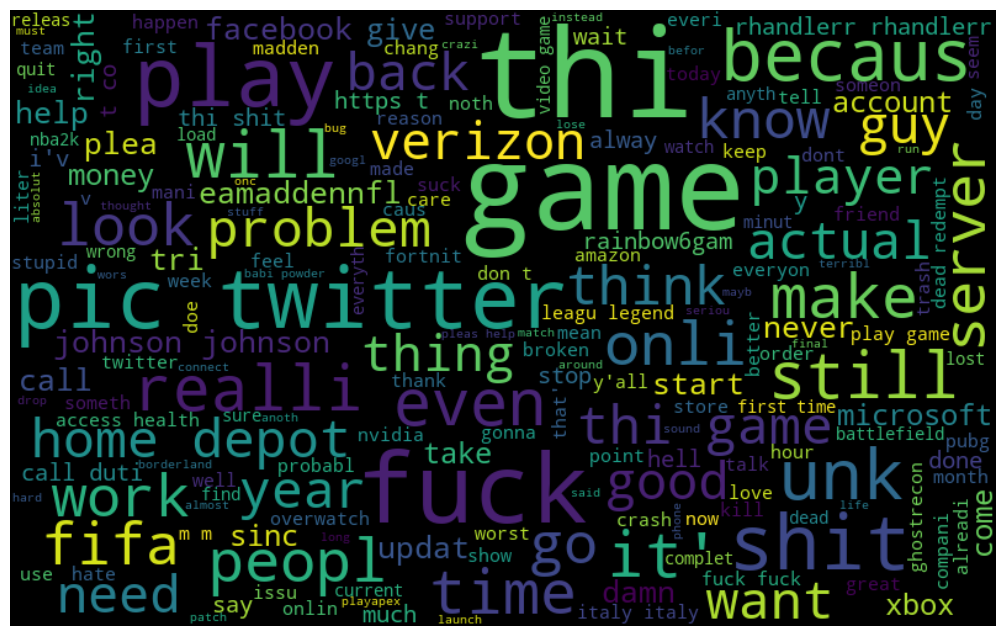

In [114]:
#Frequent words visualization for positive words
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['Label']=='Negative']])


wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

#Plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

In [115]:
#Extract the hashtag
def hashtag_extract(tweet):
    hashtags=[]
    #Loop words in the tweet
    for word in tweet:
        ht=re.findall(r"#(\w+)",word)
        hashtags.append(ht)
    return hashtags

#Extract hashtags from non-racist/sexist tweets
ht_positive=hashtag_extract(df['clean_tweet'][df['Label']=='Positive'])

#Extract hashtags from racist tweets
ht_negative=hashtag_extract(df['clean_tweet'][df['Label']=='Negative'])

#unnest list
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag': list(freq.keys()),'Count':list(freq.values())})


#Input Split ( Feature Extraction)
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

#Now split the input for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['Label'],random_state=42,test_size=0.25)

#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
model=LogisticRegression()
model.fit(x_train,y_train)

#Testing
pred=model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, pred))
print("F1 Score:", f1_score(y_test, pred, average='weighted'))

Accuracy: 0.5624230089443522
F1 Score: 0.55212525594497
